In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from common.outliers import *
from common.clustering import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

### Constants and settings

In [10]:
palette = ["orange", "royalblue"]
palette_inv = ["royalblue", "orange"]
numeric_columns = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]
nearest_neighbours_columns = ["Global_Sales", "Critic_Score", "User_Score", "NA_Sales", "JP_Sales"]

### Load and prepare dataset
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [11]:
# load dataset from file
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)

# standardize data
standardization = StandardScaler().fit(data[numeric_columns])
#data[numeric_columns] = standardization.transform(data[numeric_columns])


### Outliers - 1D

<ipython-input-12-f4d7b6031ca7>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["outliers"] = "outlier"
<ipython-input-12-f4d7b6031ca7>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers["outliers"] = "normal"
<ipython-input-12-f4d7b6031ca7>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

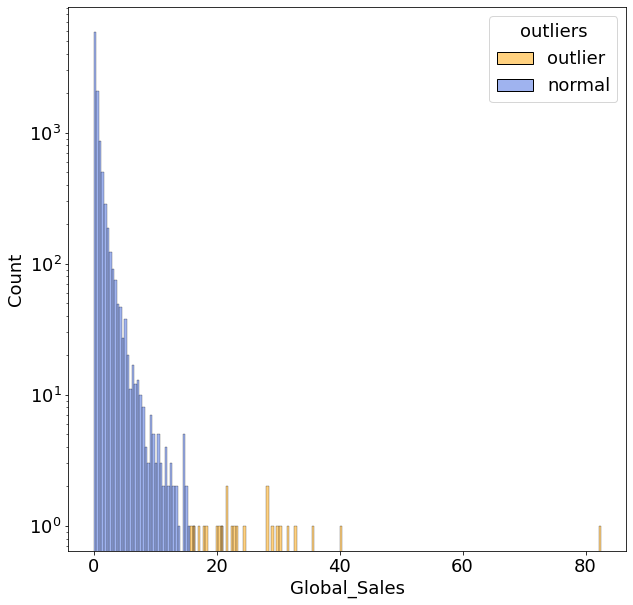

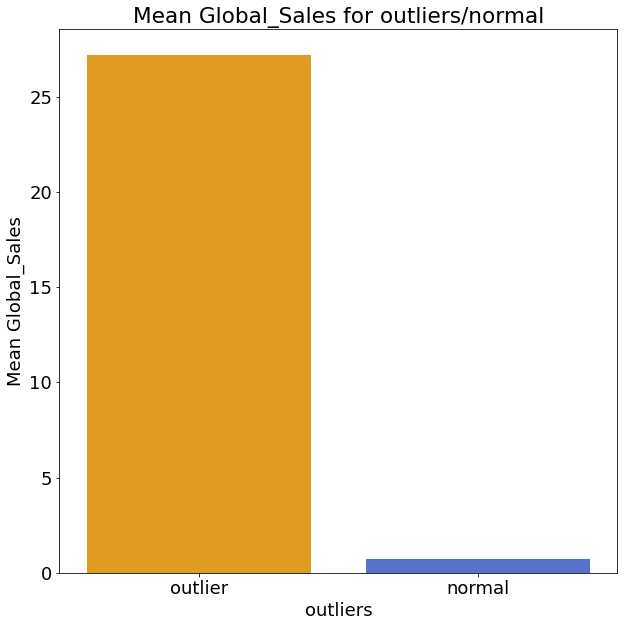

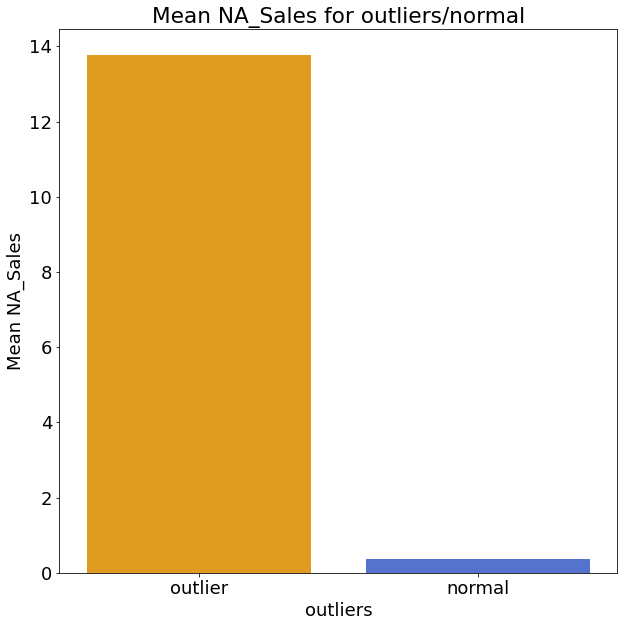

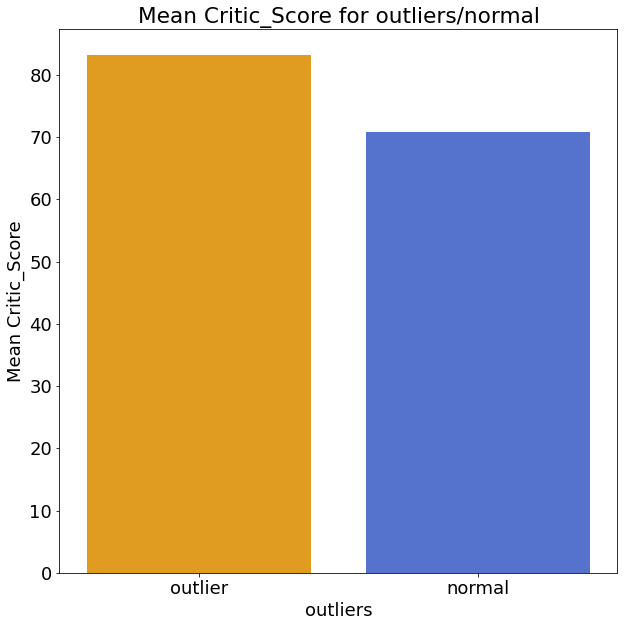

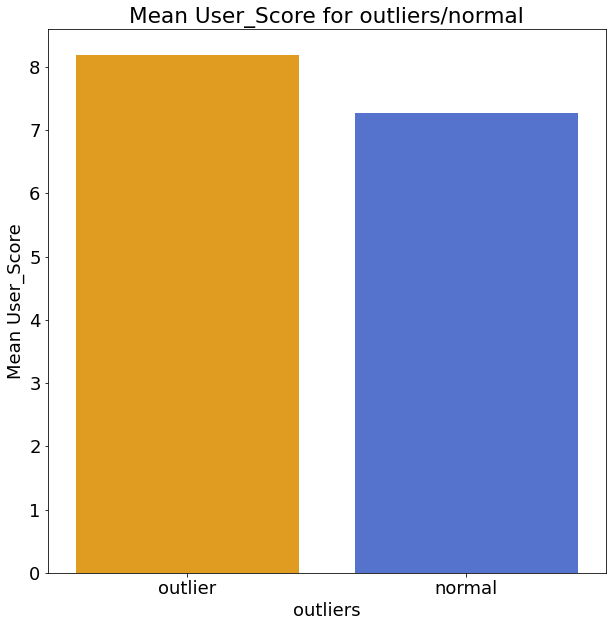

Outliers according to column Global_Sales
Wii Sports: 82.53
Super Mario Bros.: 40.24
Mario Kart Wii: 35.52
Wii Sports Resort: 32.77
Nintendogs: 24.67
Pokemon Red/Pokemon Blue: 31.37
Tetris: 30.26000000000001
Pokemon Diamond/Pokemon Pearl: 18.25
Super Mario Bros. 3: 17.28
New Super Mario Bros.: 29.8
Super Mario Land: 18.14
Kinect Adventures!: 21.81
Wii Fit Plus: 21.79
Brain Age: Train Your Brain in Minutes a Day: 20.15
Wii Play: 28.92
Duck Hunt: 28.31
New Super Mario Bros. Wii: 28.32
Mario Kart DS: 23.21
Wii Fit: 22.7
Grand Theft Auto V: 21.04
Super Mario World: 20.61
Grand Theft Auto V: 16.27
Pokemon Ruby/Pokemon Sapphire: 15.85
Pokemon Gold/Pokemon Silver: 23.1

Outliers according to column Critic_Score
Ride to Hell: 13.0
Leisure Suit Larry: Box Office Bust: 17.0
The Legend of Zelda: Ocarina of Time: 99.0
Self-Defense Training Camp: 21.0
Drake of the 99 Dragons: 22.0
NHL 15: 40.40000000000001
Angry Birds Star Wars: 46.6
Purr Pals: 50.4
All Star Cheer Squad: 50.40000000000001
TNA iMPAC

<Figure size 720x720 with 0 Axes>

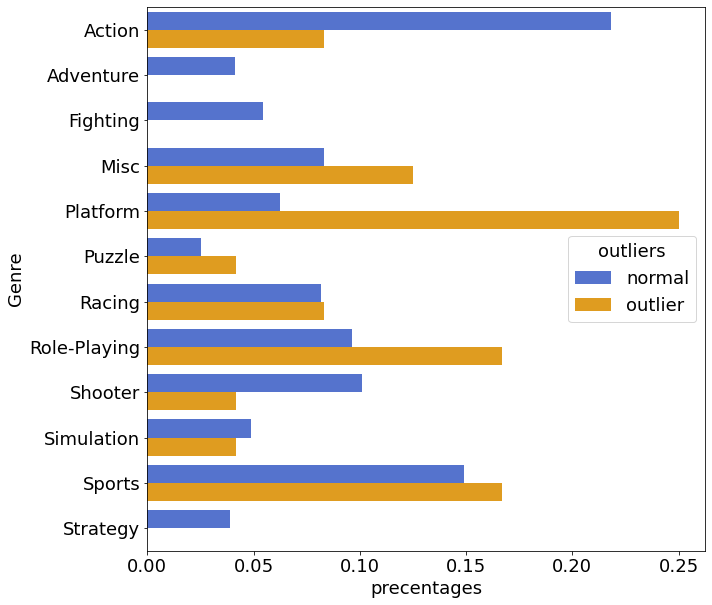

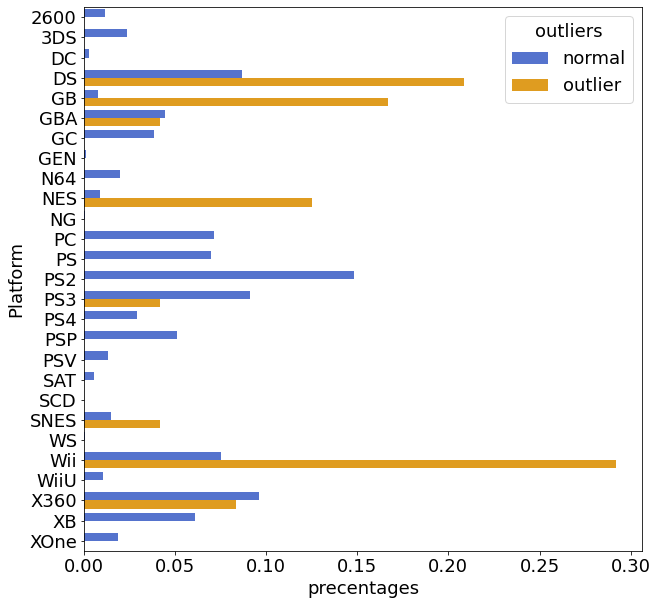

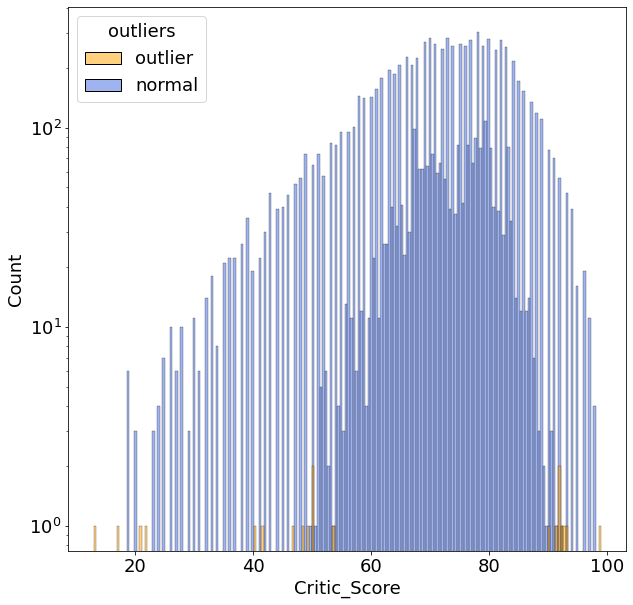

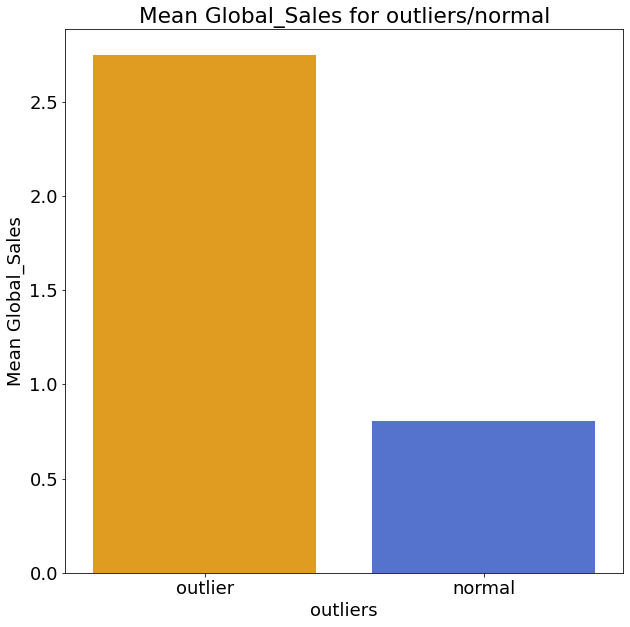

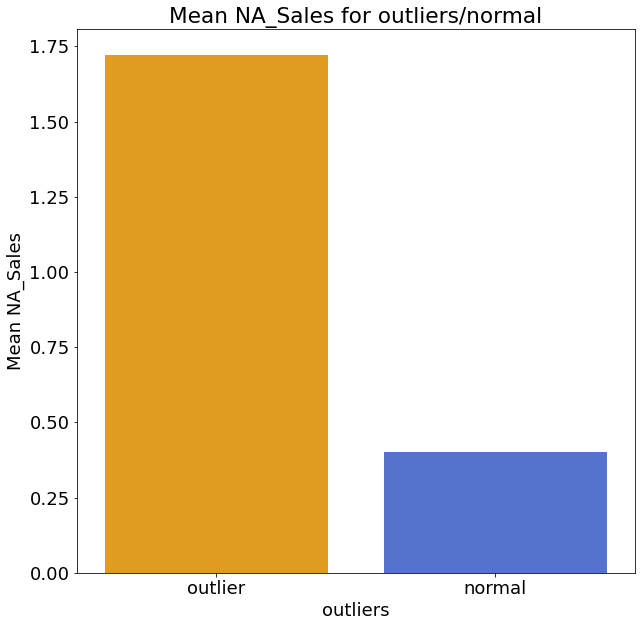

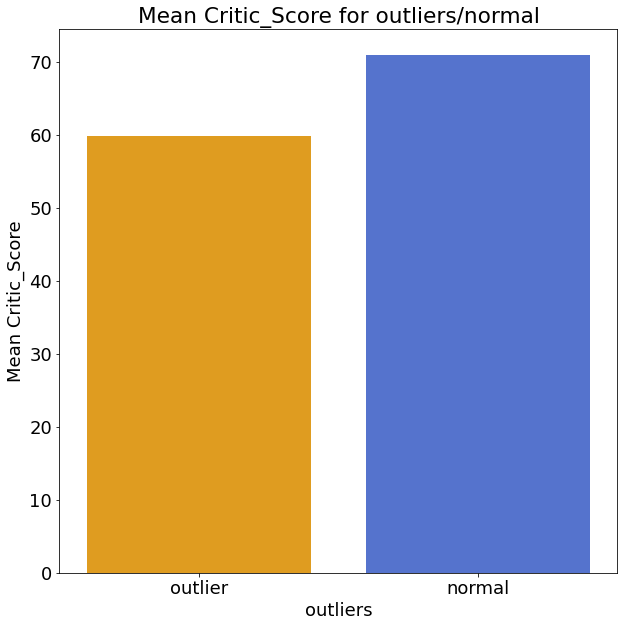

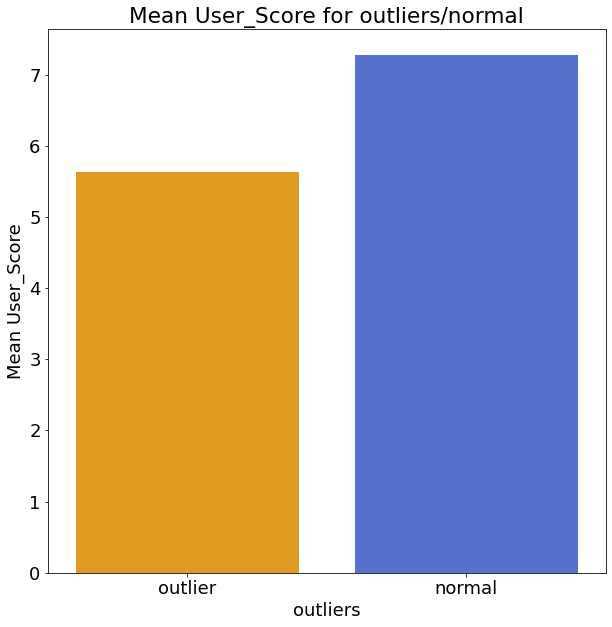

<Figure size 720x720 with 0 Axes>

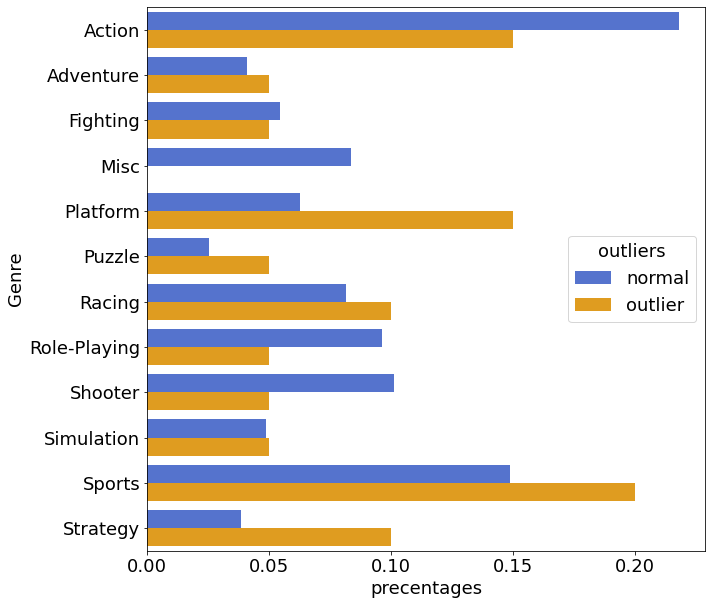

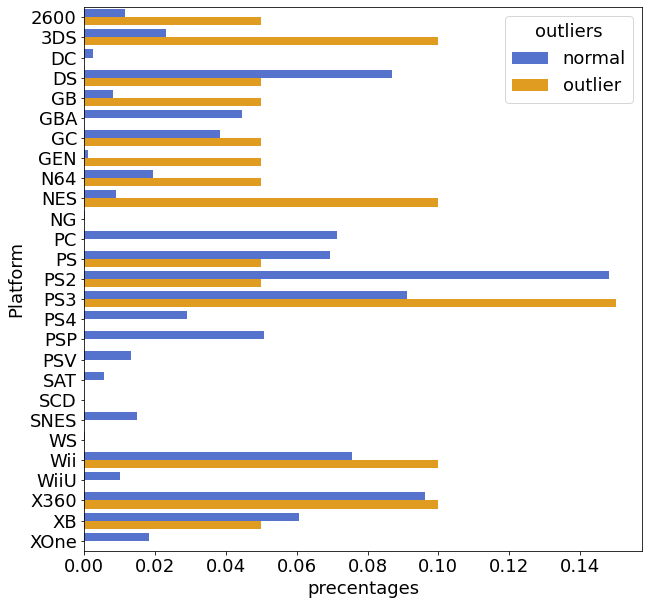

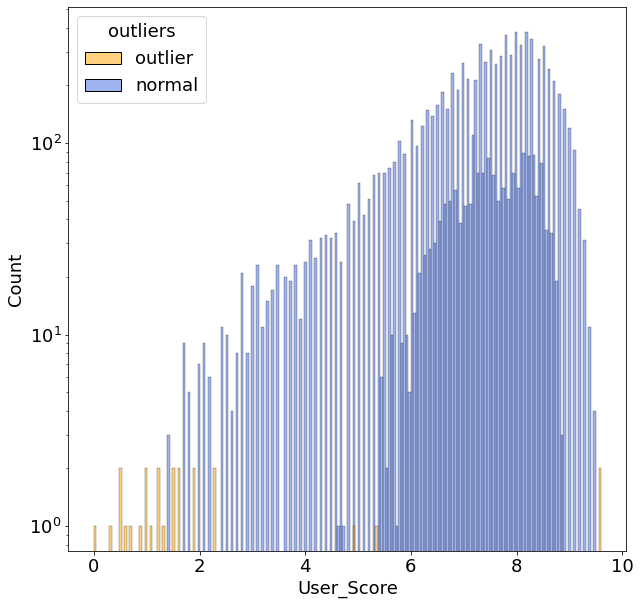

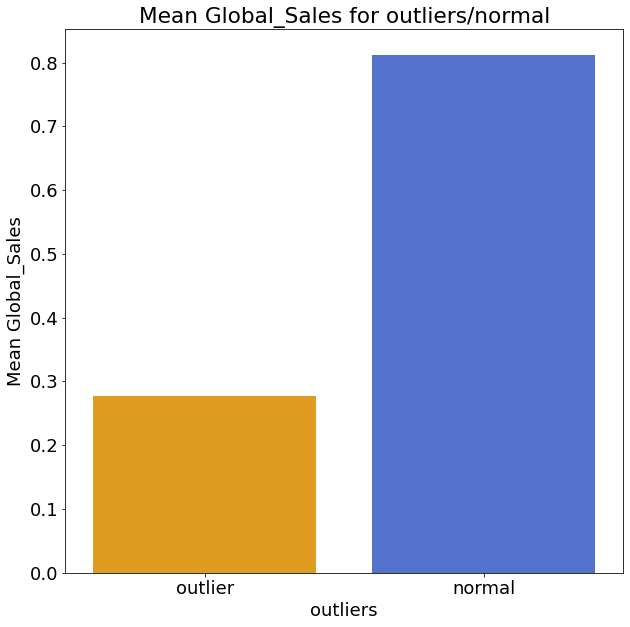

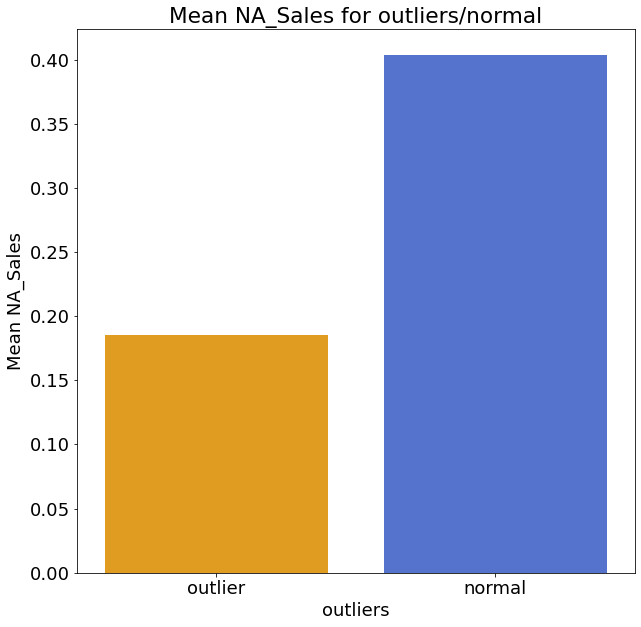

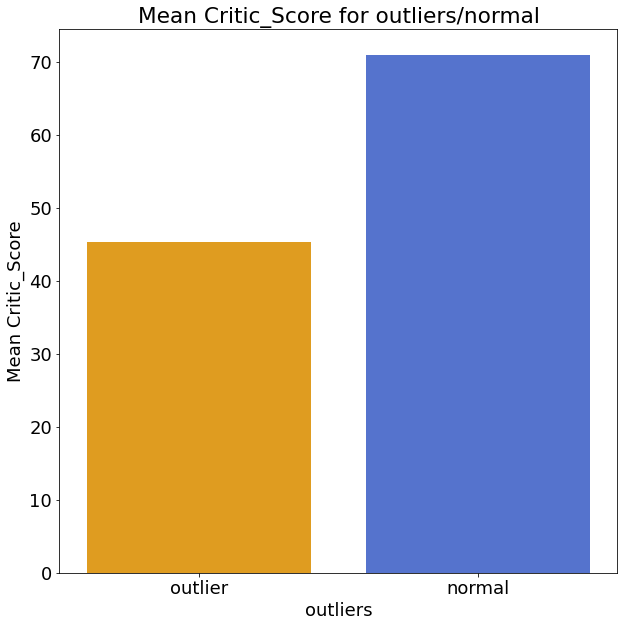

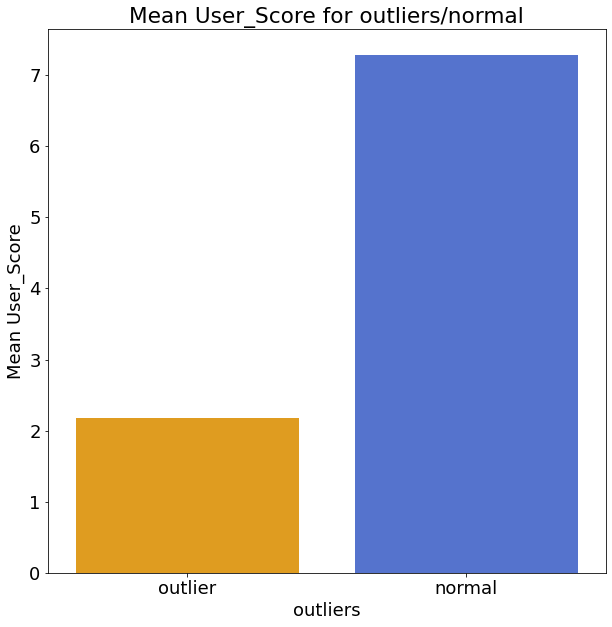

<Figure size 720x720 with 0 Axes>

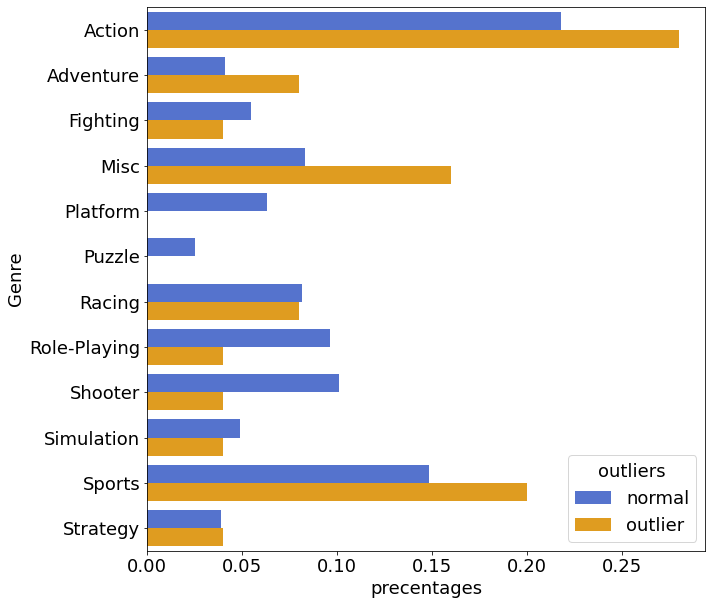

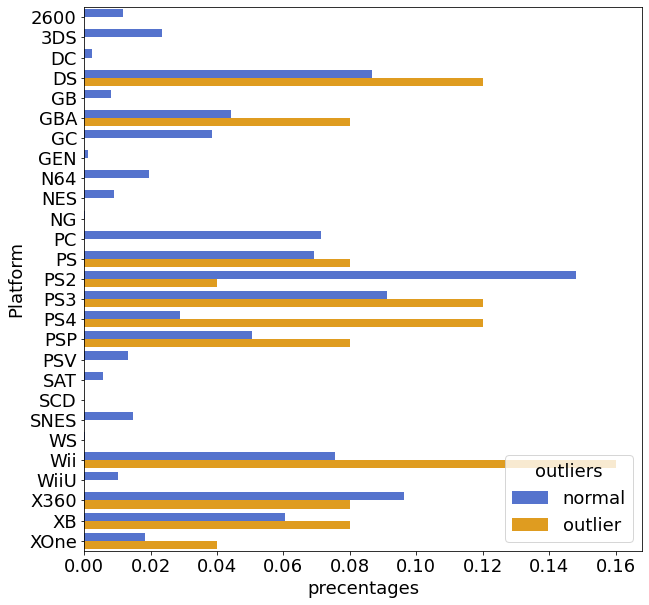

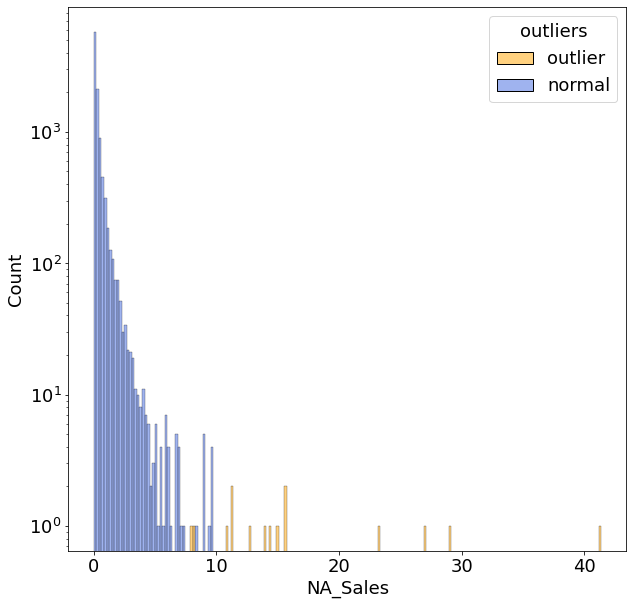

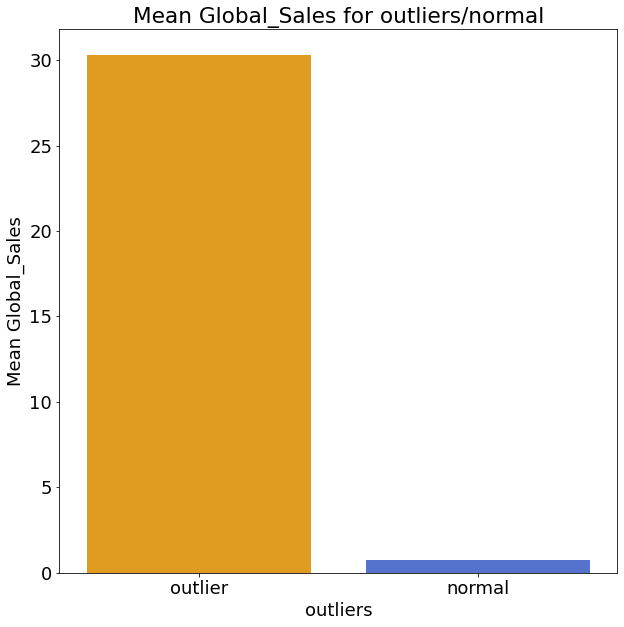

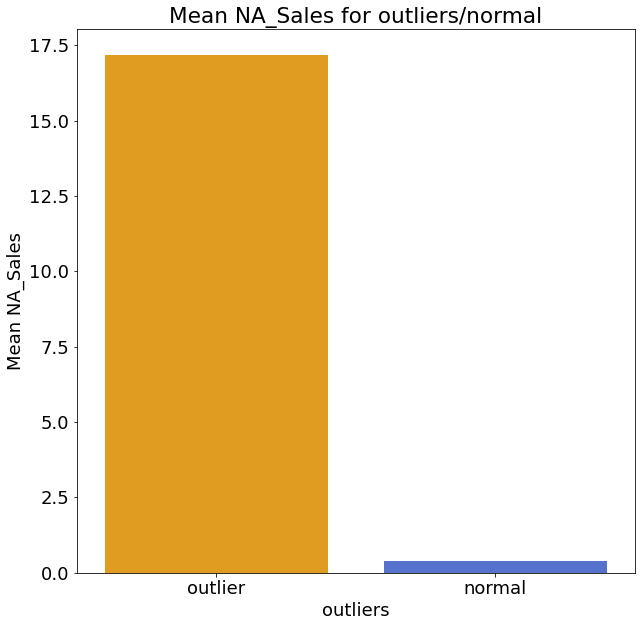

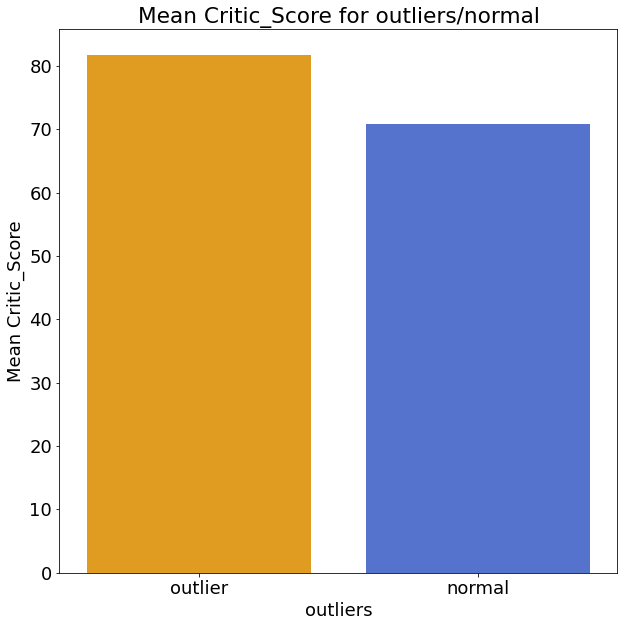

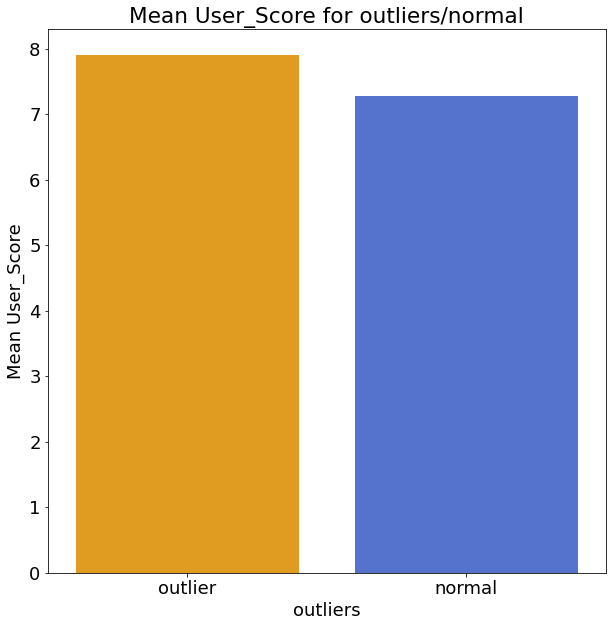

<Figure size 720x720 with 0 Axes>

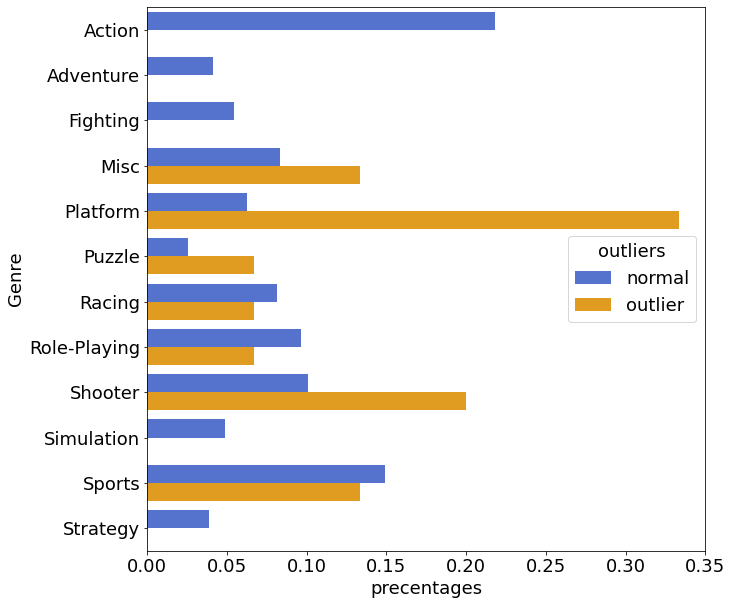

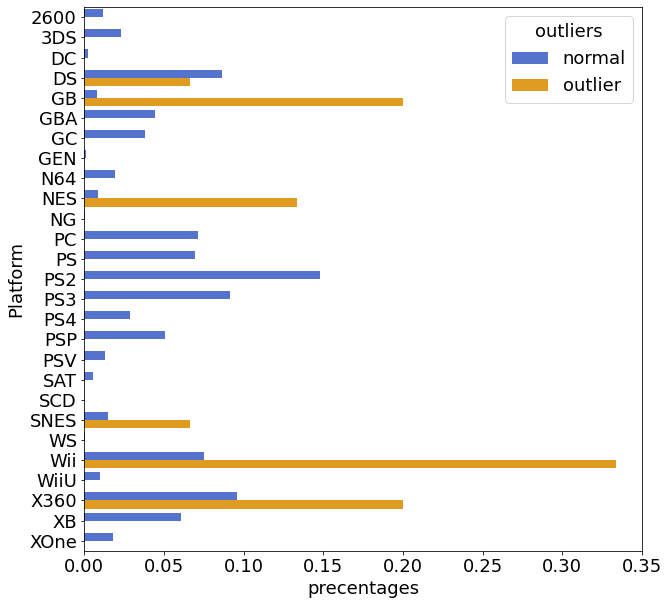

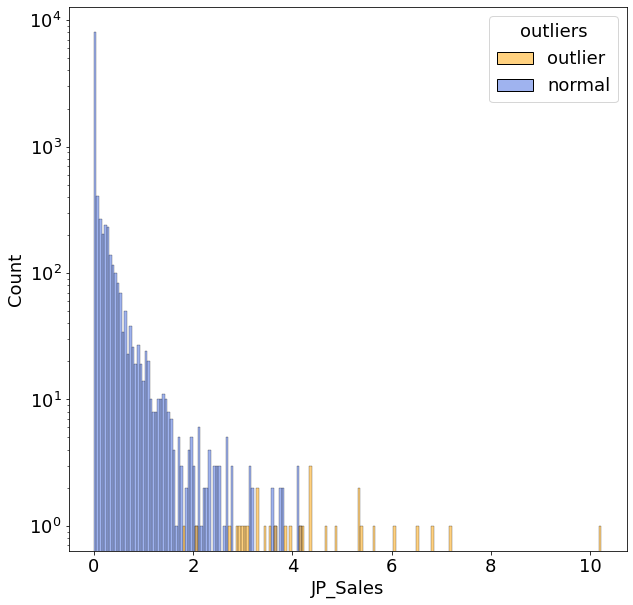

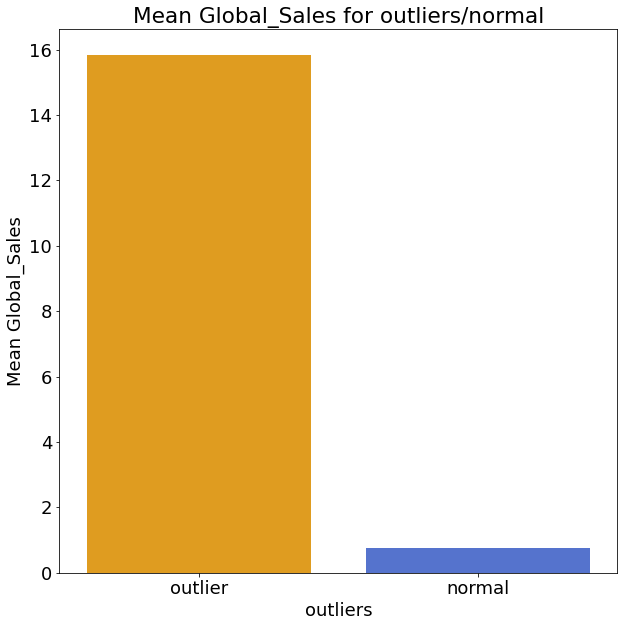

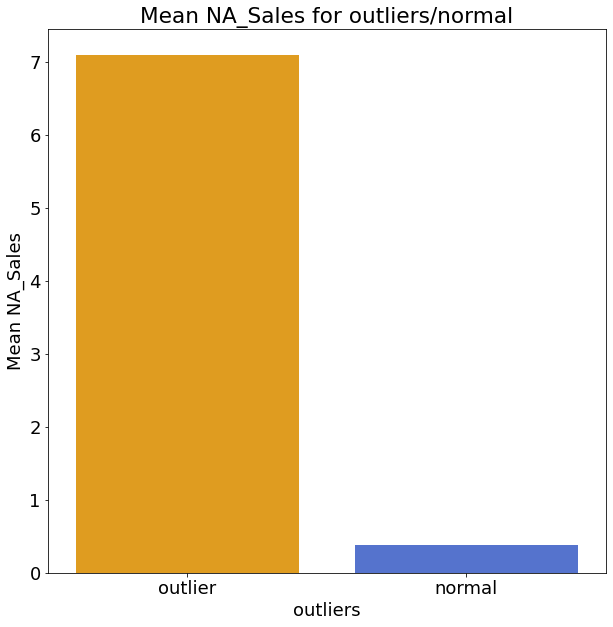

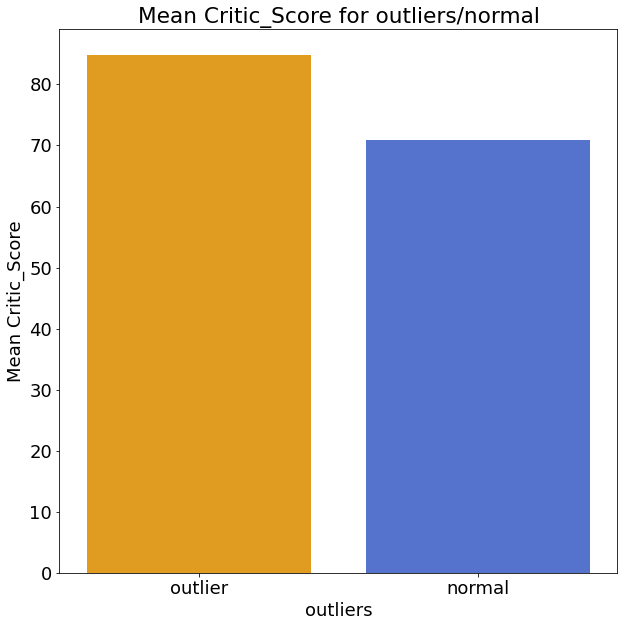

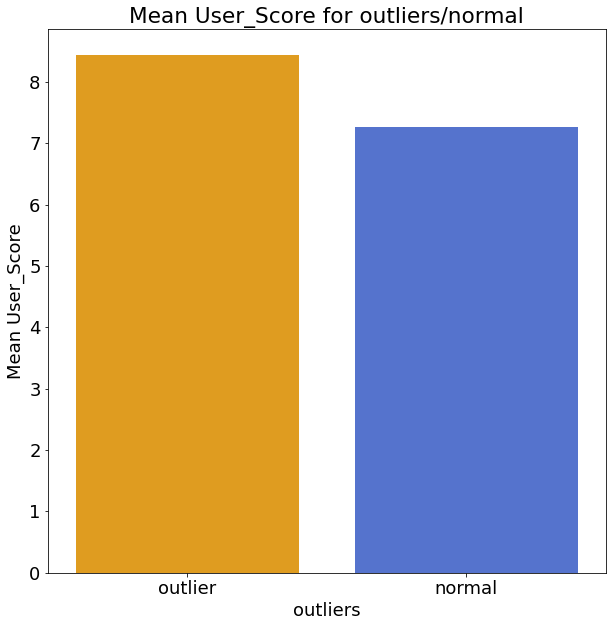

<Figure size 720x720 with 0 Axes>

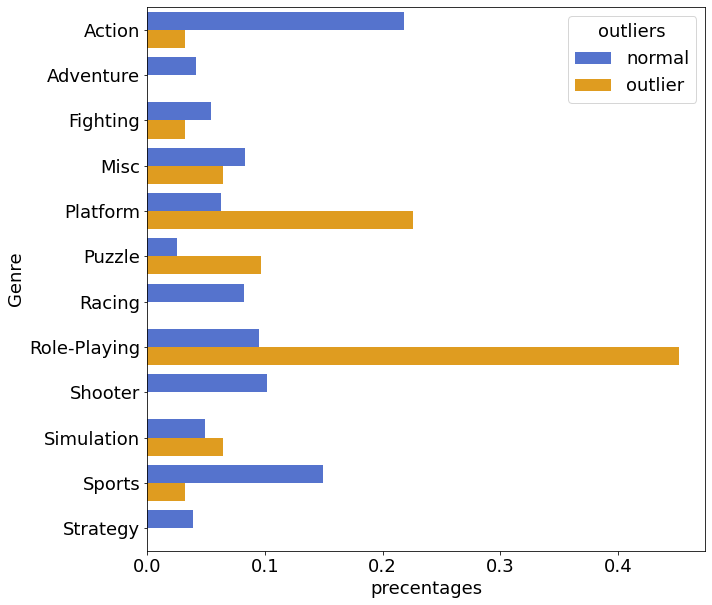

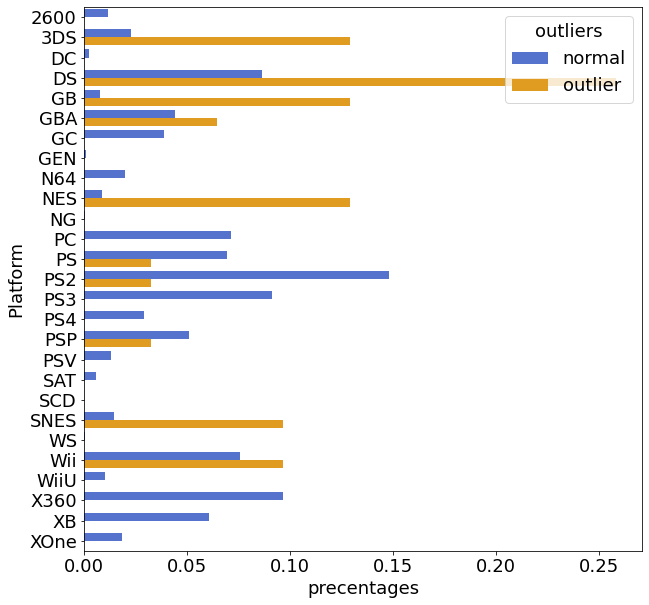

In [12]:
plt.rcParams.update({'font.size': 18})

def histogram_plot(outliers, non_outliers, x_lim=None, title=None, x_label=None, y_label=None):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()
    non_outliers[title].plot(kind="hist", title=title, logy=True, bins=150)
    outliers[title].plot(kind="hist", logy=True, bins=150)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    if x_lim:
        ax.set_xlim(*x_lim)

def plot_means_for_given_column(data, column, y_range=None, colors=None):
    ax = sns.barplot(x="outliers", y=column, data=data, ci=None, palette=colors)
    if y_range:
        ax.set(ylim=y_range)
    ax.set(ylabel="Mean {}".format(column),
           title="Mean {} for outliers/normal".format(column))
    plt.show()

r_percentage = [0.0023, 0.002, 0.0024, 0.0015, 0.0030]
k_neighbours = [2, 2, 2, 2, 2, 2]

for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])

    plt.figure()
    outliers["outliers"] = "outlier"
    non_outliers["outliers"] = "normal"
    result = pd.concat([outliers, non_outliers])
    ax = sns.histplot(result, x=column, hue="outliers", fill=True, palette=palette, log_scale=(False, True), bins=200)
    plt.figure()
    plot_means_for_given_column(result, "Global_Sales", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "NA_Sales", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "Critic_Score", colors=palette)
    plt.figure()
    plot_means_for_given_column(result, "User_Score", colors=palette)
    pretty_print_1d_outliers(outliers, column)
    plt.figure()
    # genres
    grouped_by_genre = result.groupby(["outliers", "Genre"]).size().reset_index(name='count')
    plt.figure()
    grouped_by_genre["precentages"] = grouped_by_genre["count"] / grouped_by_genre.groupby('outliers')["count"].transform('sum')
    sns.barplot(x="precentages", y="Genre", hue="outliers", data=grouped_by_genre, orient='h', palette=palette_inv)

    # platforms
    grouped_by_platform = result.groupby(["outliers", "Platform"]).size().reset_index(name='count')
    plt.figure()
    grouped_by_platform["precentages"] = grouped_by_platform["count"] / grouped_by_platform.groupby('outliers')["count"].transform('sum')
    sns.barplot(x="precentages", y="Platform", hue="outliers", data=grouped_by_platform, orient='h', palette=palette_inv)
